# 📌 Goal:
## Build a machine learning model to classify fetal health as Normal, Suspect, or Pathological using data from Cardiotocogram (CTG) exams

In [65]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('fetal_health.csv') 

# Step 3: View the first few rows
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [67]:
# Data Exploration
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<Axes: xlabel='fetal_health', ylabel='count'>

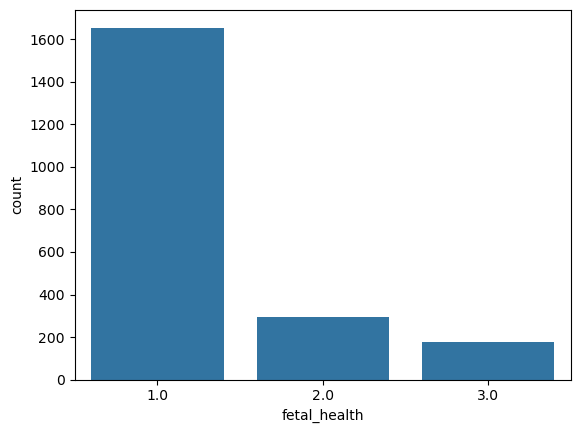

In [69]:
# Exploratory Data Analysis
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(x='fetal_health', data = df)

# ⚙️Preprocessing

In [72]:
#Seperate Input features (X) from the target (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

#Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify = y, random_state=42
)

In [74]:
# Feature Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Scale training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Modeling with Random Forest


In [77]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
#train model on training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Make Predictions
y_pred = rf_model.predict(X_test_scaled)

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       332
         2.0       0.85      0.68      0.75        59
         3.0       0.86      0.86      0.86        35

    accuracy                           0.93       426
   macro avg       0.88      0.84      0.86       426
weighted avg       0.92      0.93      0.92       426



<function matplotlib.pyplot.show(close=None, block=None)>

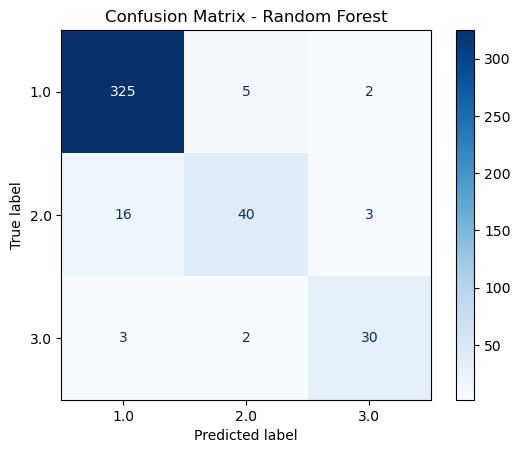

In [81]:
# Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show

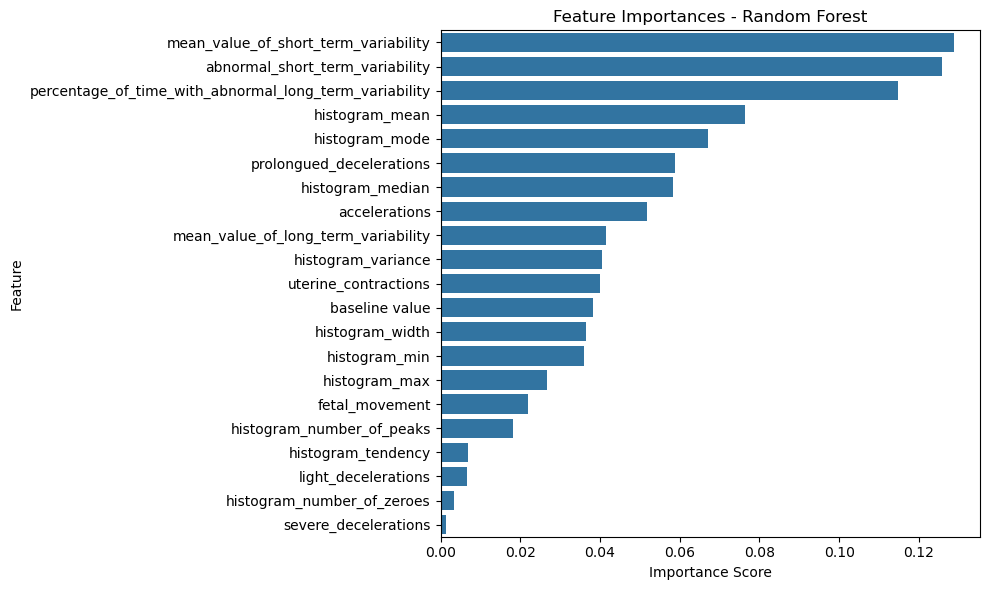

In [83]:
# Feature Importance
import numpy as np

feature_importances = pd.Series(
    rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🤖 Train a XGBoost Model


In [90]:
!pip install xgboost
from xgboost import XGBClassifier
# Recode labels to start at 0
y_encoded = y - 1  # Shifts all labels down by 1 due to XGBoost expecting labels to start with 0
#resplit and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model = XGBClassifier(eval_metric = 'mlogloss', random_state = 42)

#train on scaled data
xgb_model.fit(X_train_scaled, y_train)

#Predict to test set
y_pred_xgb = xgb_model.predict(X_test_scaled)



              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       332
     Suspect       0.83      0.75      0.79        59
Pathological       0.91      0.91      0.91        35

    accuracy                           0.94       426
   macro avg       0.90      0.88      0.89       426
weighted avg       0.93      0.94      0.94       426



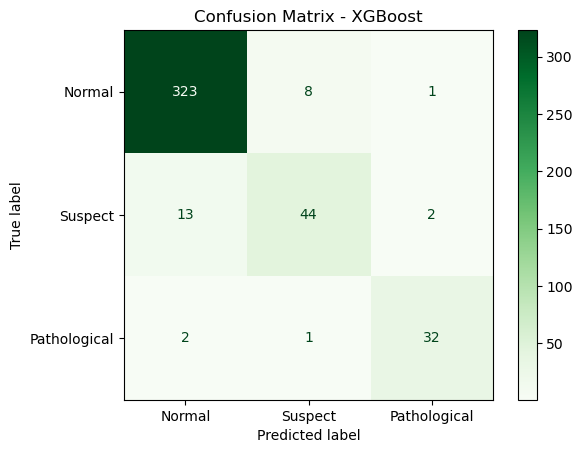

In [94]:
# Evaluate the model
print(classification_report(y_test, y_pred_xgb, target_names=['Normal', 'Suspect', 'Pathological']))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
labels = sorted(np.unique(y_test))  # Should be [0, 1, 2]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Suspect', 'Pathological'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - XGBoost')
plt.show()



# Conclusion and Results

# 📌 Objective Recap:
### The goal of this project was to classify fetal health status as Normal, Suspect, or Pathological using features derived from  Cardiotocogram (CTG) data — a low-cost, widely available diagnostic tool. This classification is critical for enabling early intervention and reducing maternal and neonatal mortality, especially in resource-constrained settings.

## 🎯 Model Performance Summary:
#### XGBoost slightly outperformed Random Forest, particularly on the Suspect and Pathological classes — which are the most clinically important.Both models demonstrated strong overall accuracy, but XGBoost was better at minimizing false negatives for higher-risk classes.

,Accuracy,Suspect F1,Pathological F1,Macro F1
Model,,,,
Random Forest,93%,0.75,0.86,0.86
XGBoost,94%,0.79,0.91,0.89


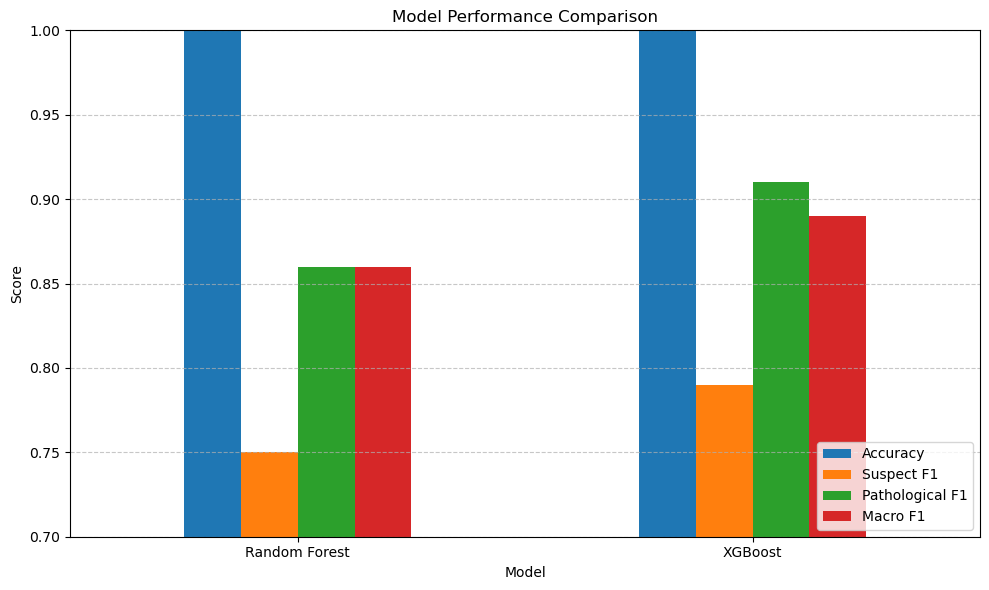

In [112]:
# Model Comparison
data = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': ['93%', '94%'],
    'Suspect F1': [0.75, 0.79],
    'Pathological F1': [0.86, 0.91],
    'Macro F1': [0.86, 0.89]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Display the table
results_df.set_index('Model', inplace=True)
display(results_df)

# Convert percentages to numeric for plotting
plot_df = results_df.copy()
plot_df['Accuracy'] = plot_df['Accuracy'].str.rstrip('%').astype(float)

# Plot
plot_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 💡 Final Thoughts:
#### The model shows high potential for use in clinical decision support tools, especially in environments where quick, accurate fetal health assessment is critical.Future work could include:

#### Hyperparameter tuning to further improve model performance.

#### Explainability tools like SHAP to increase trust in model predictions.

#### Deployment using Streamlit or a web API for real-time use.
